In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
import unittest
import tqdm.notebook as tq
import solitaire_env
import sys
import seaborn as sns
sys.setrecursionlimit(10**6)

In [2]:
# import time
# start = time.time()


# count = 0
# actions = [0]*6
# fail = [0]*6
# different_states = []
# for j in tqdm(range(1000)):
#     en = solitaire_env.env()
#     for i in range(10000):

#         action = random.sample(range(6),1)[0]
        
#         actions[action]+=1

#         won,failed = en.step(action)
        
#         if failed:
#             fail[action]+=1
#         #print(i+1,action,won)
#         if won == True:
#             count+=1
#             break
#     different_states.append(len(en.hashable_map.keys()))

# print(count)
#print(time.time()-start)

In [3]:
#en.get_pile()

In [4]:
#en.get_foundation()

In [5]:
#en.get_tableau()

In [5]:

start = time.time()


count = 0

number_of_games = 800

action_type = {0:'tableau_to_foundation_reveal',\
               1:'to_foundation_stack',2:'tableau_to_tableau_reveal',\
               3:'pile_to_tableau',\
                4:'foundation_to_tableau',\
               5:'tableau_to_tableau_not_reveal'\
              }


actions_for_each_game = [0]*number_of_games
iterations_used_per_game = [0]*number_of_games
different_states_per_game = [0]*number_of_games

def greedy_policy(en,action_number,tot,action_freq,actions,game):
    
#     if action_number >= tot:
#         return False
    
    for step in range(tot):
        
        for action in range(6):
            
            won,taken = en.step(action)
            
             
            if won == True:
                action_freq[action]+=1
                return step,True
            if taken == True:
                action_freq[action]+=1
                actions_matrix[game].append(action)
                break

        if taken == False:
            return step,False
        
       
        
    return step,False
        
        
actions_matrix = [[] for _ in range(number_of_games)]

for this_game in tq.tqdm(range(number_of_games)):
    
    
    en = solitaire_env.env()
    tot = 20000
    action_freq = {0:0,1:0,2:0,3:0,4:0,5:0}
    
    step,won = greedy_policy(en,1,tot,action_freq,actions_matrix,this_game)
             
    if won == True:
        count+=1
        
    actions_for_each_game[this_game] = action_freq
    different_states_per_game[this_game] = len(en.hashable_map.keys())
    iterations_used_per_game[this_game] = step
    
print(time.time()-start)


1757.7489960193634


In [6]:
count


0

In [7]:
it = pd.DataFrame(data = {"iterations":iterations_used_per_game})['iterations'].value_counts()

In [8]:
it

19999    200
13        73
14        67
15        59
12        57
18        48
16        48
17        46
10        35
9         30
11        28
19        22
20        16
21        13
8         13
22        10
7         10
6          8
5          5
24         5
28         2
25         2
26         1
23         1
4          1
Name: iterations, dtype: int64

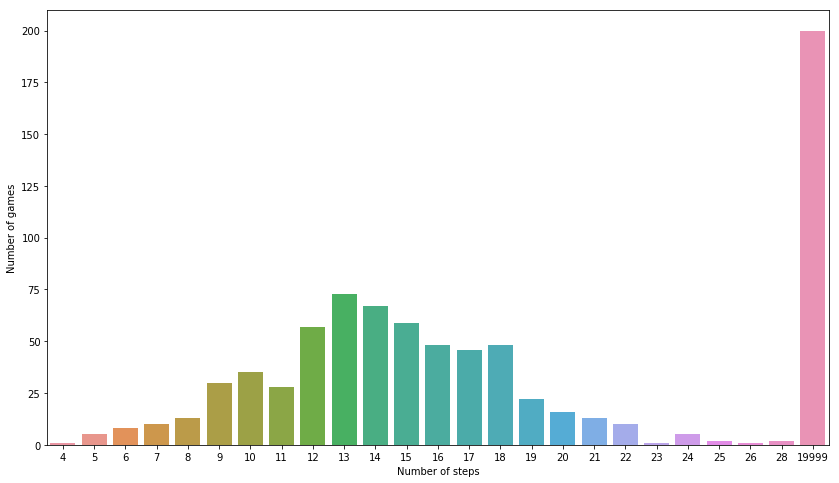

In [9]:
plt.figure(figsize=(14,8))
plt.xlabel("Number of steps")
plt.ylabel("Number of games")
sns.barplot(it.index,it.values)
plt.savefig("Foundation_Progression_included.jpg")

[1, 9, 2, 15, 2, 2]


<BarContainer object of 6 artists>

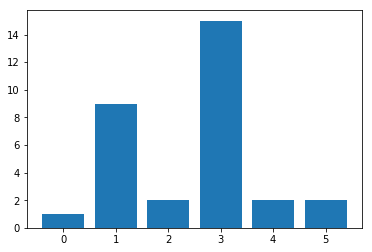

In [24]:
x = 10
mp = actions_for_each_game[x]
values = [mp[i] for i in range(6)]
print(values)
plt.bar([0,1,2,3,4,5],values)

In [43]:
en.get_foundation()

printing foundation number 1 ********************
suit = club       color = black      number =     1 speciality = ACE        face = up   
printing foundation number 2 ********************
printing foundation number 3 ********************
suit = diamond    color = red        number =     1 speciality = ACE        face = up   
printing foundation number 4 ********************


In [ ]:
Hashing function improve

look for sets

Graph Representation for neural net

